<a href="https://colab.research.google.com/github/aurisaprastika/Clustering/blob/main/Clustering_Mall_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLUSTERING MALL SEGMENTATION**

Clustering adalah metode penganalisaan data yang bertujuan untuk mengelompokkan data dengan karakteristik yang sama ke suatu wilayah yang sama dan data dengan karakteristik yang berbeda ke wilayah yang lain.


Berikut merupakan salah satu contoh analisis data customer segmetation pada suatu mall dimana data tersebut diperoleh dari https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

## **Import Libraries**

Data memiliki 5 atribut. Berikut merupakan rincian dari mall customer dataset.


1. CustomerID: Nomor ID customer.
2. Gender: Jenis kelamin customer.
3. Age: Usia customer.
4. Anual Income (k$): Pendapatan customer.
5. Spending Score (1-100): Skor untuk customer yang ditetapkan oleh mall berdasarkan perilaku.


In [9]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Raw Dataset**

Import data csv yang akan digunakan, data bersumber dari https://github.com/aurisaprastika/Clustering/blob/main/Mall_Customers.csv

In [10]:
# Import Dataset
df_segmen = pd.read_csv('https://raw.githubusercontent.com/aurisaprastika/Clustering/main/Mall_Customers.csv')
df_segmen

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
# Prints the Dataset Information
df_segmen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Berdasarkan informasi diatas terdapat 200 data dengan 2 tipe data yaitu numerik (7 atribut) dan objek (10 atribut).



*   Numerik: CustomerID, Age, Annual Income (k$), dan Spending Score (1-100)
*   Objek: Gender.

In [12]:
# Prints Descriptive Statistics
df_segmen.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


Berdasarkan hasil perhitungan descriptive statistics dengan 200 data diperoleh annual income sebesar 60,56 dengan standar deviasi sebesar 26.264721 dan spending score sebesar 50,20 dengan standar deviasi sebesar 25.823522	

In [13]:
from sklearn.preprocessing import OneHotEncoder

# Encoder
encoder = OneHotEncoder(sparse=False)

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df_segmen[['Gender']]))
df_encoded.columns = encoder.get_feature_names(['Gender'])

# Replace Categotical Data with Encoded Data
df_segmen.drop(['Gender'] ,axis=1, inplace=True)
df_encoded= pd.concat([df_segmen, df_encoded], axis=1)

# Show Encoded Dataframe
df_copy = df_encoded
df_copy

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0.0,1.0
1,2,21,15,81,0.0,1.0
2,3,20,16,6,1.0,0.0
3,4,23,16,77,1.0,0.0
4,5,31,17,40,1.0,0.0
...,...,...,...,...,...,...
195,196,35,120,79,1.0,0.0
196,197,45,126,28,1.0,0.0
197,198,32,126,74,0.0,1.0
198,199,32,137,18,0.0,1.0


## **Data Processing**

Pertama-tama lakukan standarisasi data untuk menyamakan rentang atau viriabilitas data.

In [14]:
# Importing Standardscalar Module 
from sklearn.preprocessing import StandardScaler 

# Set Name for StandardScaler as scaler
scaler = StandardScaler() 

# Fit Standardization
column_names = df_segmen.columns.tolist()
df_segmen[column_names] = scaler.fit_transform(df_segmen[column_names])
df_segmen.sort_index(inplace=True)
df_segmen

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061
196,1.671450,0.441365,2.497807,-0.861839
197,1.688771,-0.491602,2.497807,0.923953
198,1.706091,-0.491602,2.917671,-1.250054


## **Data Visualization**

Text(0, 0.5, 'Annual Spend')

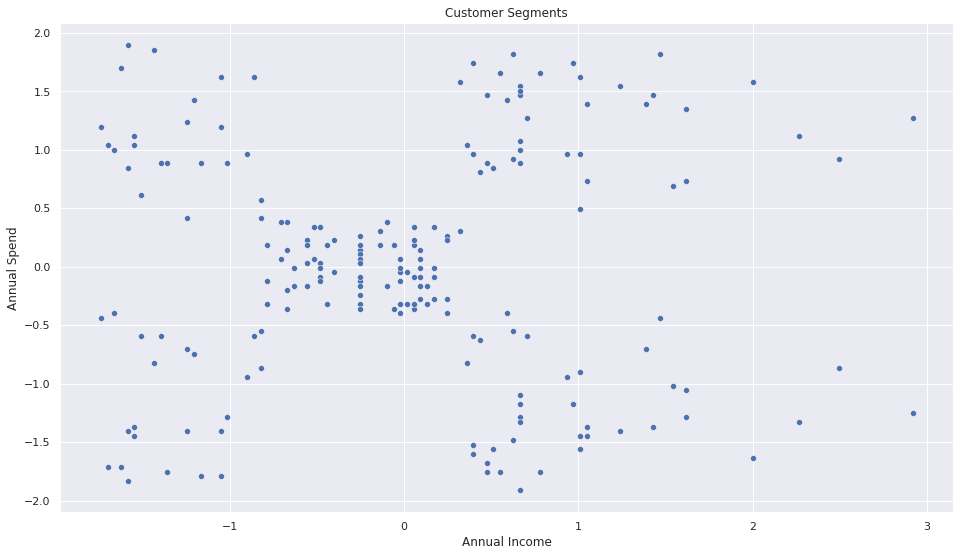

In [16]:
# Styling Plot
sns.set() 
plt.rcParams['figure.figsize'] = (16, 9)

# Visualizing the Data
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_segmen)
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Annual Spend')

## **K-Means Clustering**

K-Means Clustering adalah metode penganalisaan data yang melakukan proses pemodelan tanpa supervisi (unsupervised) dan merupakan salah satu metode yang melakukan pengelompokan data dengan sistem partisi.

Ada dua jenis data clustering yang sering dipergunakan dalam proses pengelompokan data yaitu Hierarchical dan Non-Hierarchical, dan K-Means merupakan salah satu metode data clustering non-hierarchical atau Partitional Clustering.

**Search for the Optimum Number of Clusters (k)**

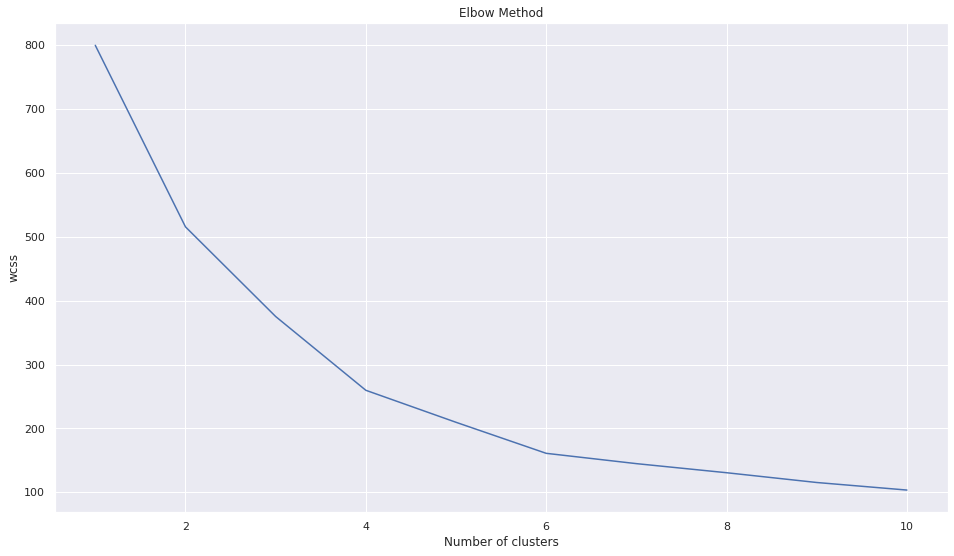

In [17]:
# Transform Data Frame to Numpy Array
income = df_segmen.to_numpy()
income

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(income)
    wcss.append(kmeans.inertia_)
  
# Visualize 
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [18]:
# Silhoutte Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(income)
    label = kmeans.labels_
    sil_coeff = silhouette_score(income, label, metric='euclidean')
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.3185134408711024
For n_clusters=3, The Silhouette Coefficient is 0.3375693760556384
For n_clusters=4, The Silhouette Coefficient is 0.4140456252637291
For n_clusters=5, The Silhouette Coefficient is 0.4272395443393026
For n_clusters=6, The Silhouette Coefficient is 0.4390404164555763
For n_clusters=7, The Silhouette Coefficient is 0.41859544296751916
For n_clusters=8, The Silhouette Coefficient is 0.40549421568452915
For n_clusters=9, The Silhouette Coefficient is 0.3853377415516418
For n_clusters=10, The Silhouette Coefficient is 0.38468044385017913


**Modeling K-Means**

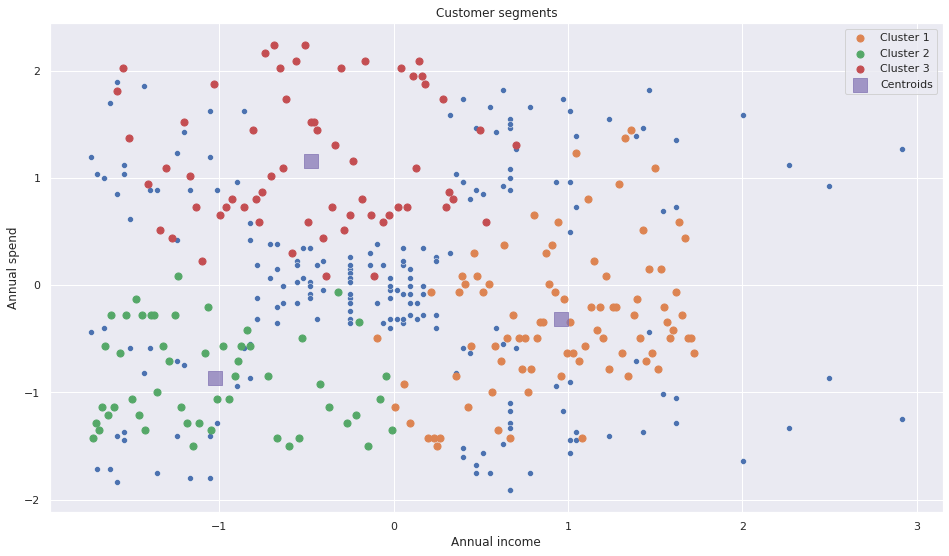

In [20]:
# Apply the K-Means Model to the Data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster = kmeans.fit_predict(income)

# Visualising Clusters for k=3
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_segmen)
plt.scatter(income[cluster == 0, 0], income[cluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(income[cluster == 1, 0], income[cluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(income[cluster == 2, 0], income[cluster == 2, 1], s = 50, label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='s', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income')
plt.ylabel('Annual spend')
plt.legend()
plt.show()

In [21]:
# Add Cluster Information to the Raw Data
df_segmen['cluster'] = cluster
df_segmen

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
0,-1.723412,-1.424569,-1.738999,-0.434801,1
1,-1.706091,-1.281035,-1.738999,1.195704,1
2,-1.688771,-1.352802,-1.700830,-1.715913,1
3,-1.671450,-1.137502,-1.700830,1.040418,1
4,-1.654129,-0.563369,-1.662660,-0.395980,1
...,...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061,0
196,1.671450,0.441365,2.497807,-0.861839,0
197,1.688771,-0.491602,2.497807,0.923953,0
198,1.706091,-0.491602,2.917671,-1.250054,0


In [22]:
# Save= Result
df_segmen.to_csv('income_clusters.csv', index=False)

## **Hierarchical Clustering**

Hierarchical Cluster Analysis atau HCA merupakan metode analisis klaster yang berupaya membangun hierarki klaster. Endpoint adalah sekumpulan cluster, di mana setiap cluster berbeda satu sama lain, dan objek dalam setiap cluster secara luas mirip satu sama lain.

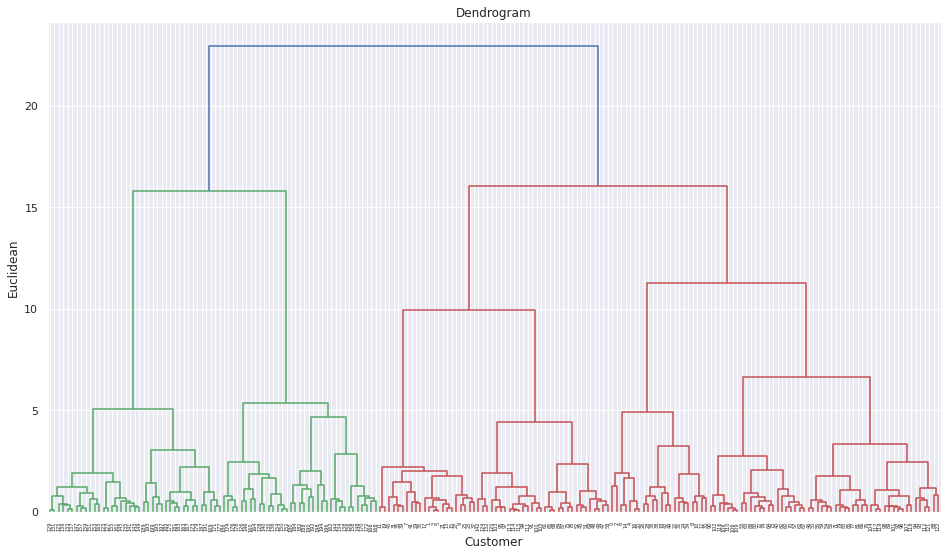

In [23]:
# Modeling and Visualizing Clusters by Dendogram
import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(income, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean')
plt.show()

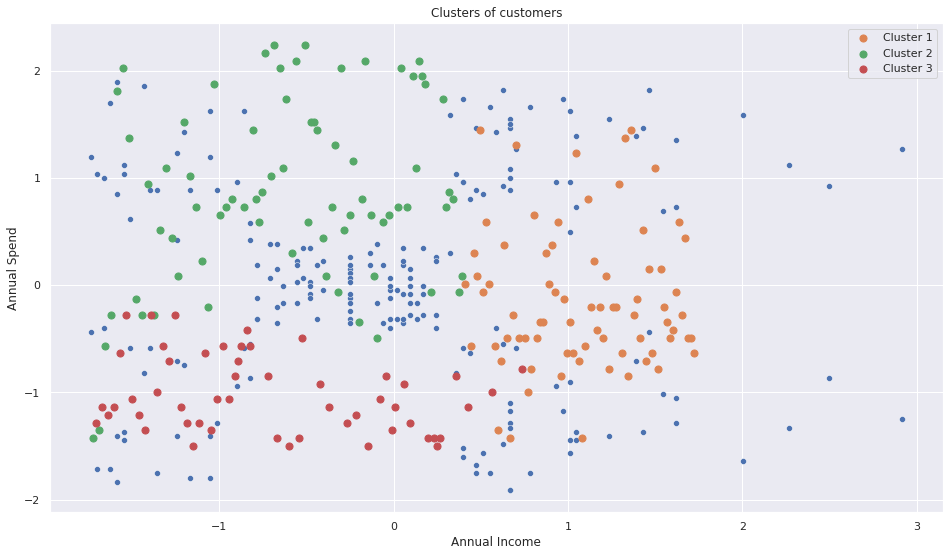

In [25]:
# Apply the Hierarchical Clustering Model to the Dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hcluster = hc.fit_predict(income)

# Visualising Clusters for k=3
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_segmen)
plt.scatter(income[hcluster == 0, 0], income[hcluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(income[hcluster == 1, 0], income[hcluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(income[hcluster == 2, 0], income[hcluster == 2, 1], s = 50, label = 'Cluster 3')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Annual Spend')
plt.legend()
plt.show()